In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
dataset_path = 'Dataset/bar_pass_prediction.csv'
original_data = pd.read_csv(dataset_path)
# Make a copy of the dataset
data_full = original_data.copy()

In [3]:
# List of columns to keep
columns_to_keep = [
    'pass_bar',  'ugpa', 'decile1', 'decile1b',
    'decile3', 'lsat', 'grad', 'fulltime', 'fam_inc',
    'tier', 'race1', 'sex'
]

# Convert 'grad' to binary where 'Y' is 1 and anything else is 0
data_full['grad'] = data_full['grad'].apply(lambda x: 1 if x == 'Y' else 0)

df = data_full[columns_to_keep]

In [4]:
df.head()

,pass_bar,ugpa,decile1,decile1b,decile3,lsat,grad,fulltime,fam_inc,tier,race1,sex
0,1,3.5,10.0,10.0,10.0,44.0,1,1.0,5.0,4.0,white,1.0
1,1,3.5,5.0,5.0,4.0,29.0,1,1.0,4.0,2.0,white,1.0
2,1,3.5,3.0,3.0,2.0,36.0,1,1.0,1.0,3.0,white,2.0
3,1,3.5,7.0,7.0,4.0,39.0,1,1.0,4.0,3.0,white,2.0
4,1,3.5,9.0,9.0,8.0,48.0,1,1.0,4.0,5.0,white,2.0


In [5]:
numerical_columns = [ 'pass_bar',  'ugpa', 'decile1', 'decile1b',
                      'decile3', 'lsat', 'grad', 'fulltime', 'fam_inc',
                      'tier', 'sex']

In [6]:
def create_bootstrap_samples(df, sample_size=len(df), n_samples=1000, numerical_columns=None):

    """
    Creates synthetic data for numerical columns using bootstrapping.
  
    Args:
        df: A pandas DataFrame containing the data.
        sample_size: The desired size of each bootstrap sample (default: original data size).
        n_samples: The number of bootstrap samples to generate (default: 1000).
        numerical_columns: A list of numerical column names (optional). If not provided,
                          all numerical columns will be used.
  
    Returns:
        A pandas DataFrame containing bootstrap means for each numerical column.
    """

    # Handle case where numerical_columns is not provided
    if numerical_columns is None:
        numerical_columns = df.select_dtypes(include=np.number).columns

    # Create a dictionary to store bootstrap means for each column
    column_means = {}

    # Loop n_samples times
    for _ in range(n_samples):
        # Create a bootstrap sample of sample_size with replacement
        df_bootstrap_sample = df.sample(n=sample_size, replace=True)

        # Iterate over numerical columns and calculate means
        for column in numerical_columns:
            sample_mean = df_bootstrap_sample[column].mean()
            column_means.setdefault(column, []).append(sample_mean)  # Append to list for each column

    # Return a DataFrame with column means (one column per numerical feature)
    return pd.DataFrame(column_means)


In [7]:
def evaluate_bootstrapped_data(original_data, bootstrapped_data, numerical_columns):
    """
    Evaluates the bootstrapped data by comparing it to the original data.
  
    Args:
        original_data: A pandas DataFrame containing the original data.
        bootstrapped_data: A pandas DataFrame containing bootstrap means for each column.
  
    Returns:
        A dictionary containing the evaluation results for each metric.
    """
    original_data = original_data[numerical_columns]
    bootstrapped_data = bootstrapped_data[numerical_columns]

    evaluation_results = {}

    for column in bootstrapped_data.columns:
        bootstrapped_values = bootstrapped_data[column]
        evaluation_results[column] = {
            'original_mean': original_data[column].mean(),
            'bootstrapped_mean': bootstrapped_values.mean(),
            'original_std': original_data[column].std(),
            'bootstrapped_std': bootstrapped_values.std()
        }

    return evaluation_results


In [8]:
# Generate synthetic data
bootstrapped_data = create_bootstrap_samples(df, n_samples=1000, numerical_columns=numerical_columns)


In [9]:
bootstrapped_data.head()

,pass_bar,ugpa,decile1,decile1b,decile3,lsat,grad,fulltime,fam_inc,tier,sex
0,0.948409,3.216196,5.705546,5.531428,5.525052,36.846686,0.995983,1.076686,3.463796,3.777290,1.567711
1,0.946222,3.218258,5.706469,5.524793,5.524745,36.729535,0.996207,1.075785,3.464362,3.760534,1.561086
2,0.946624,3.210675,5.713890,5.534207,5.530654,36.788312,0.996296,1.077985,3.467179,3.771326,1.563203
3,0.946624,3.220110,5.723492,5.549243,5.535785,36.821226,0.996519,1.077656,3.466902,3.783131,1.559250
4,0.948320,3.219155,5.731998,5.551261,5.563890,36.798737,0.995537,1.075617,3.472662,3.778913,1.556647


In [10]:
# Evaluate the bootstrapped data
evaluation_results = evaluate_bootstrapped_data(df, bootstrapped_data, numerical_columns=numerical_columns)

# Print the evaluation results
evaluation_results = pd.DataFrame(evaluation_results)
evaluation_results.head()

,pass_bar,ugpa,decile1,decile1b,decile3,lsat,grad,fulltime,fam_inc,tier,sex
original_mean,0.947829,3.215451,5.708234,5.528481,5.525934,36.767907,0.995894,1.076878,3.466046,3.768814,1.561378
bootstrapped_mean,0.947800,3.215208,5.708009,5.528261,5.525768,36.768603,0.995908,1.076875,3.466022,3.768904,1.561585
original_std,0.222377,0.404073,2.783098,2.854800,2.851286,5.463248,0.063947,0.266404,0.856425,1.179375,0.496229
bootstrapped_std,0.001502,0.002608,0.018194,0.019091,0.019395,0.036474,0.000427,0.001786,0.005574,0.007909,0.003307


In [11]:
bootstrapped_data.head()

,pass_bar,ugpa,decile1,decile1b,decile3,lsat,grad,fulltime,fam_inc,tier,sex
0,0.948409,3.216196,5.705546,5.531428,5.525052,36.846686,0.995983,1.076686,3.463796,3.777290,1.567711
1,0.946222,3.218258,5.706469,5.524793,5.524745,36.729535,0.996207,1.075785,3.464362,3.760534,1.561086
2,0.946624,3.210675,5.713890,5.534207,5.530654,36.788312,0.996296,1.077985,3.467179,3.771326,1.563203
3,0.946624,3.220110,5.723492,5.549243,5.535785,36.821226,0.996519,1.077656,3.466902,3.783131,1.559250
4,0.948320,3.219155,5.731998,5.551261,5.563890,36.798737,0.995537,1.075617,3.472662,3.778913,1.556647


In [12]:
# Create a figure
def plot_data_and_bootstrapped(df, bootstrapped_data, numerical_columns):
    """
    Plots the distribution of bootstrapped data with original data mean as a line.
  
    Args:
        df: A pandas DataFrame containing the original data.
        bootstrapped_data: A pandas DataFrame containing bootstrap means for each column.
        numerical_columns: A list of numerical column names.
    """

    for column in numerical_columns:

        # Get confidence intervals for bootstrapped data
        ci_lower_boot = bootstrapped_data[column].quantile(q=0.025)
        ci_higher_boot = bootstrapped_data[column].quantile(q=0.975)

        # Get original data mean
        original_mean = df[column].mean()

        # Create a figure
        fig, ax = plt.subplots(figsize=(10, 5))

        # Plot bootstrapped data distribution with KDE
        sns.histplot(bootstrapped_data[column], kde=True, bins=30, ax=ax)
        ax.set_title(f'Bootstrapped Mean Distribution of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Density')
        ax.axvline(ci_lower_boot, color='red', ls='--', label='CI 95%')
        ax.axvline(ci_higher_boot, color='red', ls='--')
        ax.legend()

        # Add horizontal line for original mean
        ax.axvline(x=original_mean, color='green', ls='-', label='Original Mean')
        ax.legend()
        

        plt.show()


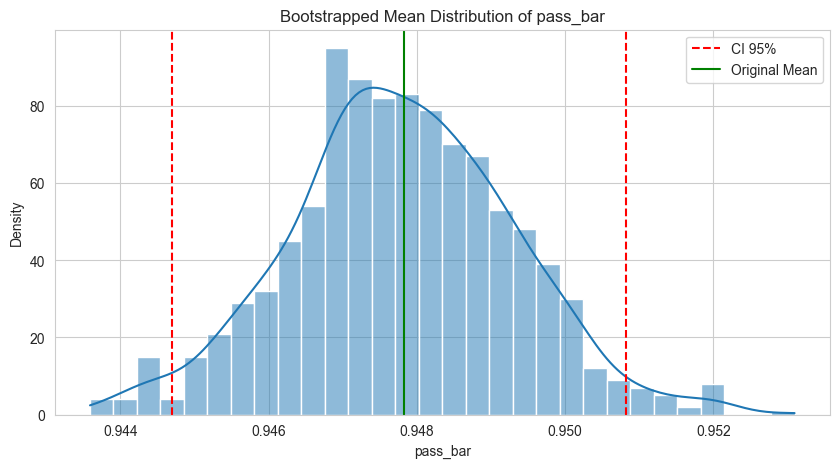

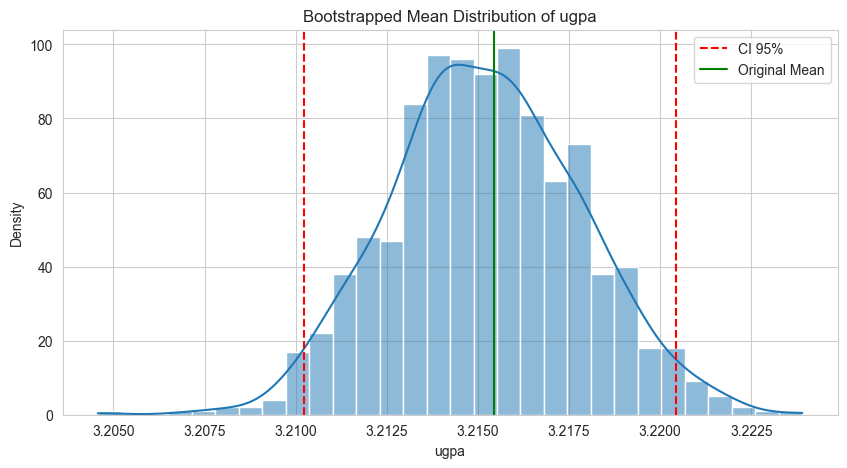

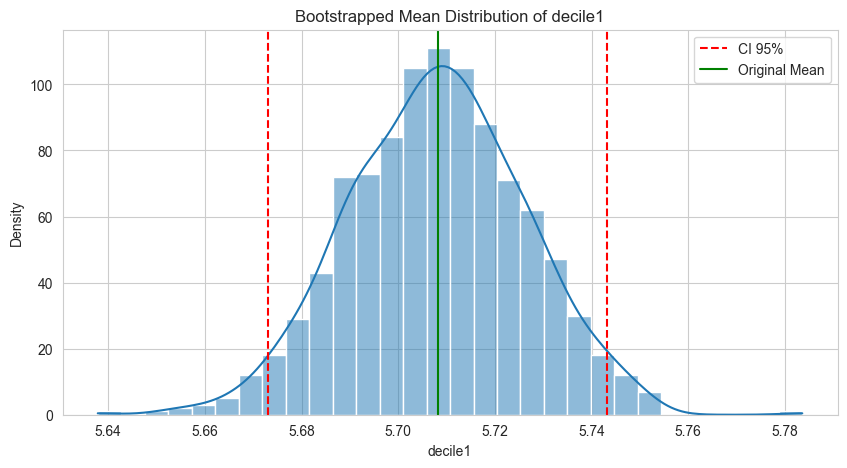

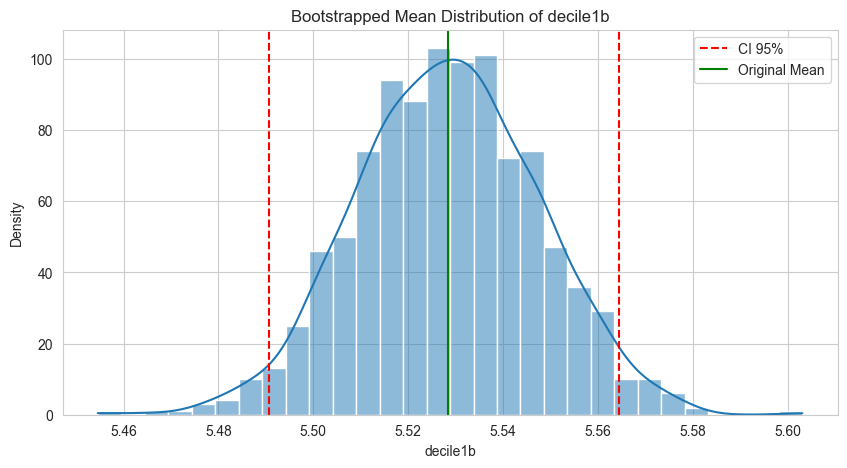

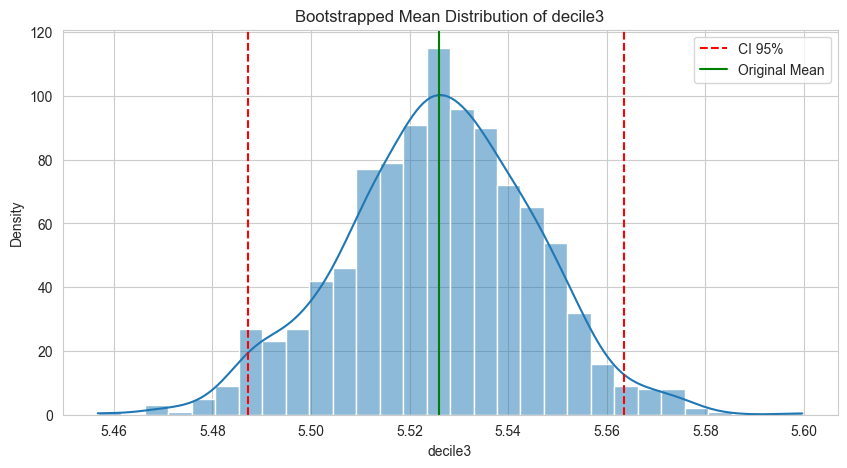

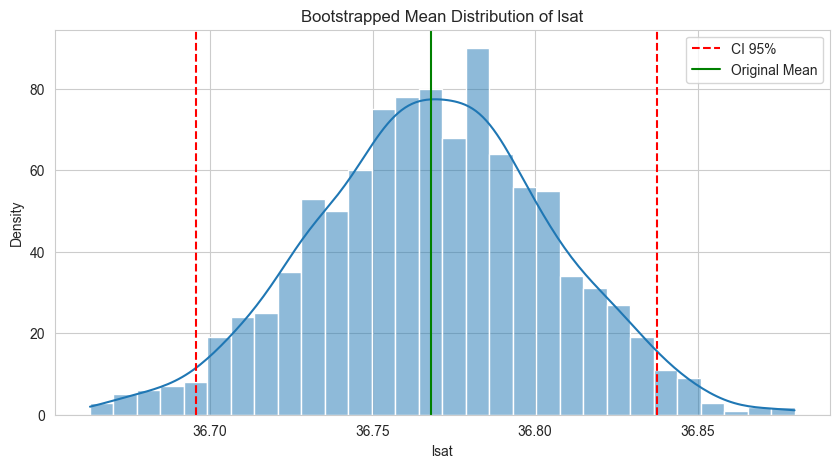

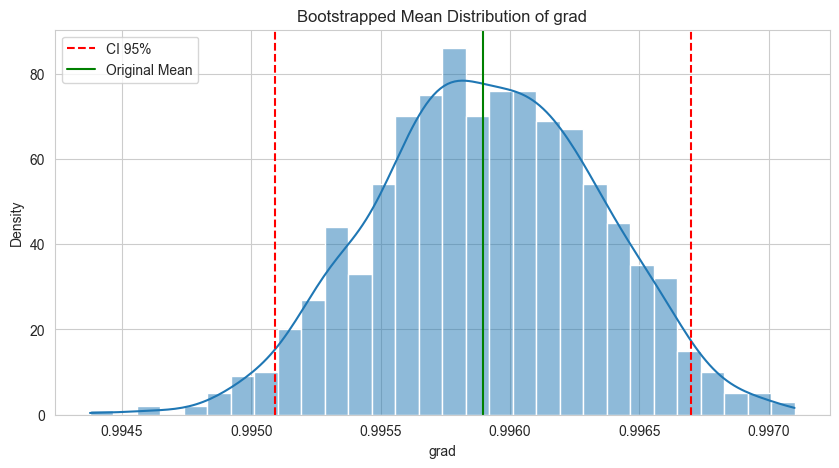

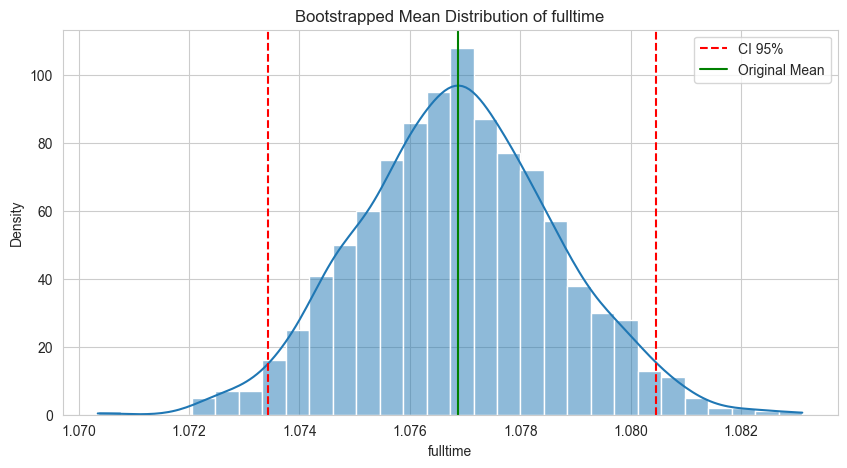

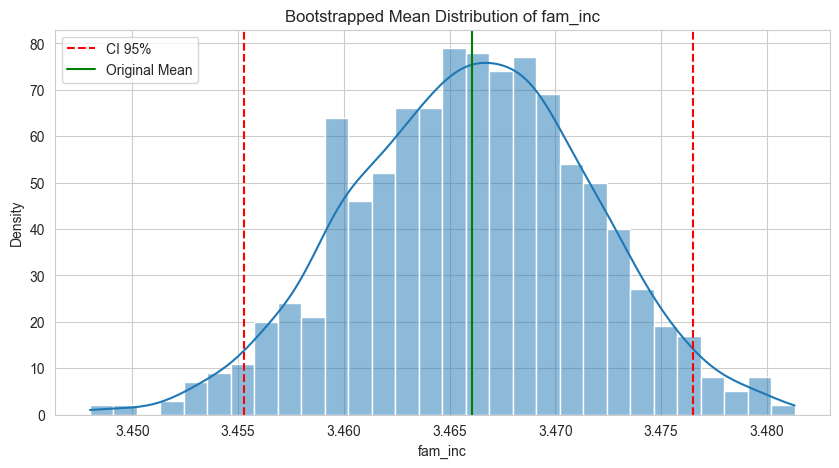

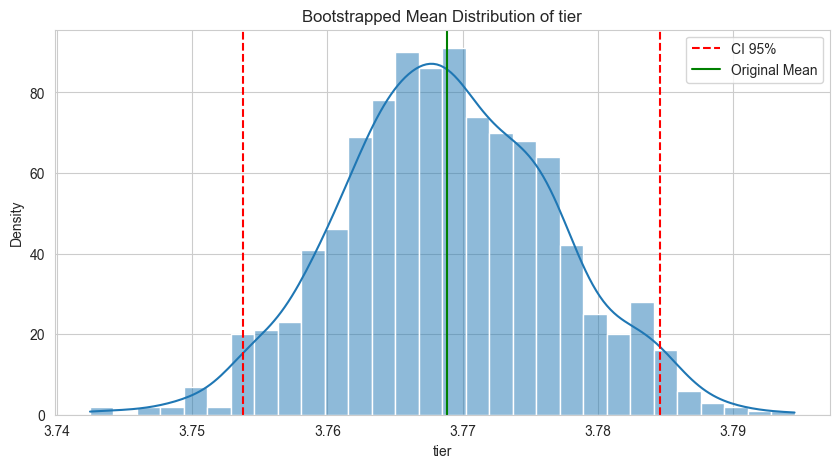

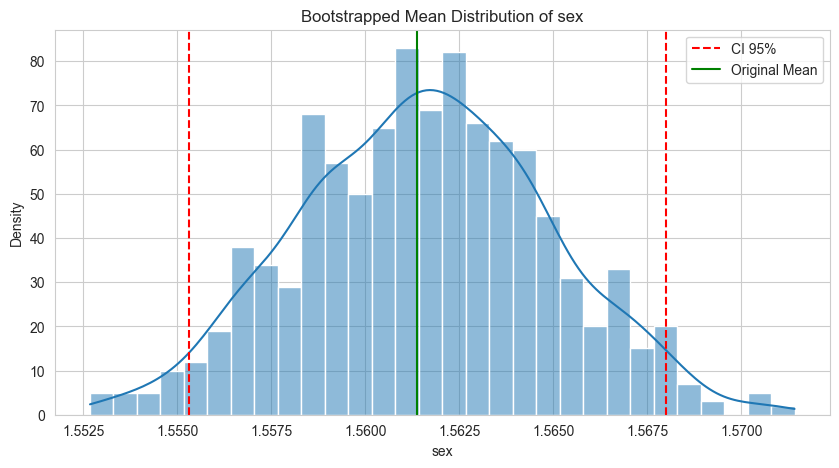

In [13]:
plot_data_and_bootstrapped(df, bootstrapped_data, numerical_columns)